## Simple Linear Regression Version II

An approach using two different packages :
1. Sklearn model
2. Scipy stats

In [1]:
#import package as usual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
%matplotlib inline

In [2]:
#load file and see the head
df = pd.read_csv('simulation.csv')
df.head(10)

,x,y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
5,6,12
6,7,14
7,8,16
8,9,18
9,10,20


### Exploratory Data Analysis

In [5]:
#check type of the data each column
df.dtypes

x    int64
y    int64
dtype: object

In [6]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
x    100 non-null int64
y    100 non-null int64
dtypes: int64(2)
memory usage: 1.6 KB


In [8]:
#check the statictic descriptive
df.describe()

,x,y
count,100.000000,100.000000
mean,50.500000,100.920000
std,29.011492,58.113035
min,1.000000,2.000000
25%,25.750000,51.500000
50%,50.500000,101.000000
75%,75.250000,150.500000
max,100.000000,200.000000


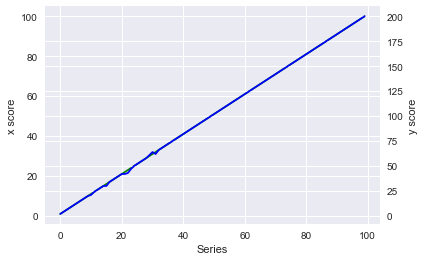

In [9]:
#plot both data into one figure

fig, graph = plt.subplots()
graph.plot(df['x'], color='green')
graph.set_xlabel('Series')
graph.set_ylabel('x score')

graph2 = graph.twinx()
graph2.plot(df['y'], color='blue')
graph2.set_ylabel('y score')

plt.show()

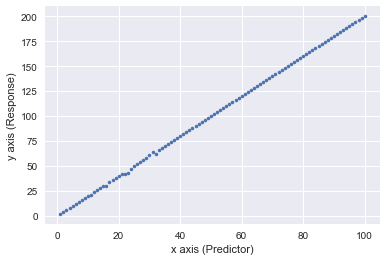

In [10]:
#Scatter plot of those data with assumption x = predictor and y = response

plt.plot(df['x'], df['y'], marker='.', linestyle='none')
plt.xlabel('x axis (Predictor)')
plt.ylabel('y axis (Response)')
plt.show()

From the data above, using scatter plot, we have a hypothesis that actually there is a strong positive correlation between x and y. So, high possibility that the error rate in linear regression is too small as well and can be represented on linear regression model very well. Because if we see the scatter plot, the intercept is too small.

## **Linear Regression using Sklearn**

In [11]:
#Split the data into two parts (training and testing). it can be used to know the accuracy of model. Put 80% training and 20% testing separation
X = df['x'].values.reshape(-1,1)
y = df['y'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
#check the separation
print('X train length : ', len(X_train))
print('Y train length : ', len(y_train))
print('X test length : ', len(X_test))
print('Y test length : ', len(y_test))

X train length :  80
Y train length :  80
X test length :  20
Y test length :  20


In [13]:
#Creating a model using training dataset
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
#Show the slope using function
print('Slope : ', regressor.coef_)

#Show the intercept
print('Intercept : ', regressor.intercept_)

Slope :  [[2.00337209]]
Intercept :  [-0.26010902]


Meaning in every increasing of x, it will increase around 2x of y.

In [15]:
#Comparing y prediction with y actual and see the accuration
y_prediction = regressor.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_prediction.flatten()})
comparison

,Actual,Predicted
0,54,53.830937
1,174,174.033263
2,6,5.750007
3,112,111.928728
4,152,151.996170
5,188,188.056868
6,34,33.797217
7,148,147.989426
8,110,109.925356
9,192,192.063612


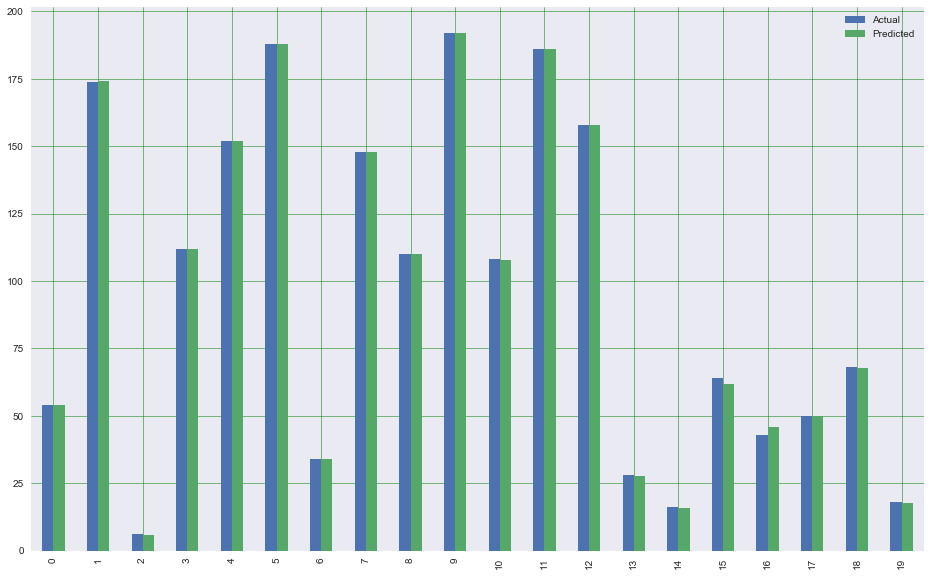

In [16]:
#Plotting the comparison

comparison.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

The different between actual and predicted value is too small

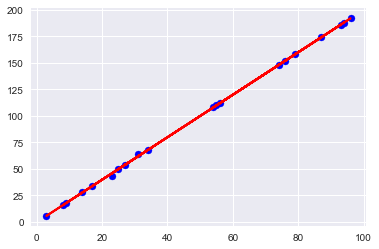

In [17]:
#Plot the scatter of test data

plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_prediction, color='red', linewidth=2)
plt.show()

From the regression line above, the line is almost fit will all the actual data.

## **Evaluation Metrics**

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

Mean Absolute Error: 0.352188955777461
Mean Squared Error: 0.6474702095437201
Root Mean Squared Error: 0.8046553358697872


## Simple linear regression using Scipy Stats

In [19]:
#Execute the model with all data
slope, intercept, r, p, std_err = stats.linregress(df['x'], df['y'])

In [20]:
#Show the slope using function
print('Slope : ', slope)

#Show the intercept
print('Intercept : ', intercept)

Slope :  2.003024302430243
Intercept :  -0.23272727272727423


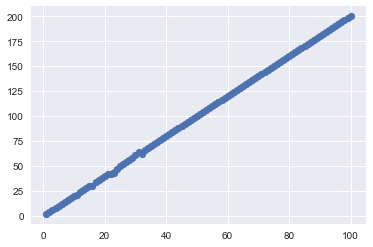

In [24]:
#Define function for predict the regression line and draw it
def graph(x):
    return slope * x + intercept

plotting = list(map(graph, df['x']))

#show the scatter
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], plotting)
plt.show()

In [25]:
#show the r-square and std error

print('R-Square : ', r)
print('Std error : ', std_err)

R-Square :  0.9999602219687388
Std error :  0.0018047738003254025


Based on data above we can use linear regression to represent the data.
The formula is **Y = 2.003X - 0.232** if we use scipy stats